# Assignment 2

### PEDRO PUTRANANDA LENDE

## Import Pustaka yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #optional ggplot-like style
import math
import statistics
import scipy.stats

#menghilangkan warnings
import warnings
warnings.filterwarnings("ignore")\

pd.set_option("display.max.columns", None)

## Import Dataset

Assignment 2 ini menggunakan dataset NYC Property Sales yang diperoleh dari Kaggle.

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


BOROUGH: Kode digit untuk borough tempat properti tersebut berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).

## Data Prepocessing

In [4]:
# Print the dimension of data set
df.shape

(84548, 22)

Berdasarkan hasil diatas diketahui bahwa dataset tersebut terdiri atas 22 kolom dan 84.548 baris

In [5]:
#Melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [8]:
#Ubah Type data menjadi numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
#Ubah type data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [10]:
#Cek Kembali Type Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [11]:
# get number of unique values for each column
counts = df.nunique()
counts

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6061
GROSS SQUARE FEET                  5690
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

Diketahui hanya terdapat 1 value pada kolom EASE-MENT sehingga kita drop

In [12]:
#Drop kolom EASE-MENT
df.drop(["EASE-MENT"], axis=1, inplace=True)

In [13]:
dups = df.duplicated()
print(dups.any())

True


In [14]:
df.duplicated().sum()

765

Diketahui terdapat 765 duplikasi dalam data

In [15]:
df.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [16]:
df.drop_duplicates().reset_index()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83778,84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
83779,84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
83780,84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
83781,84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [17]:
df = df.drop_duplicates().reset_index(drop=True)

In [18]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


## Data Cleaning

In [19]:
#Mengecek missing value dari dataset
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [20]:
from numpy import nan

df = df.replace(' ', nan)

In [21]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [22]:
df.isna().sum() /len(df) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.880847
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.880847
ADDRESS                            0.000000
APARTMENT NUMBER                  77.502596
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.097001
GROSS SQUARE FEET                 32.685628
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

## Mengatasi Missing Values

In [23]:
df.drop(labels=['APARTMENT NUMBER'], axis=1, inplace=True)

In [24]:
#replacing missing values

df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

In [25]:
df1 = df.dropna()

In [26]:
df1.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [27]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,6.960700e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1.280703e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,2.300000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


## Central Tendencies

### MEAN

In [28]:
mean_residential_units = statistics.mean(df['RESIDENTIAL UNITS'])
mean_residential_units

1.9999761288089468

Mean (rata-rata) dari Residential units yang terjual di pasar properti kota new york selama periode 12 bulan adalah 1,9999

In [29]:
mean_commercial_units = statistics.mean(df['COMMERCIAL UNITS'])
mean_commercial_units

0.18367687955790554

Mean (rata-rata) dari Commercial units yang terjual di pasar properti kota new york selama periode 12 bulan adalah 0,1837

In [30]:
mean_total_units = statistics.mean(df1['TOTAL UNITS'])
mean_total_units

2.791318690496075

Mean (rata-rata) dari total units yang terjual di pasar properti kota new york selama periode 12 bulan adalah 2,79131

In [31]:
mean_land_square_feet = statistics.mean(df1['LAND SQUARE FEET'])
mean_land_square_feet

3270.9037706697845

Mean (rata-rata) dari Land Square Feet adalah 3270,90377

In [32]:
mean_gross_square_feet = statistics.mean(df1['GROSS SQUARE FEET'])
mean_gross_square_feet

3525.874749457157

Mean (rata-rata) dari Gross Square Feet adalah 3525.8747

In [33]:
mean_sale_price = statistics.mean(df1['SALE PRICE'])
mean_sale_price

1158309.9487222314

Mean (rata-rata) dari sale price (harga penjualan) adalah 1158309.9487

### MEDIAN

In [34]:
median_residential_units = statistics.median(df1['RESIDENTIAL UNITS'])
median_residential_units

1.0

Median atau nilai tengah dari Residential Units adalah 1,0

In [35]:
median_commercial_units = statistics.median(df['COMMERCIAL UNITS'])
median_commercial_units

0

Median atau nilai tengah dari Commercial Units adalah 0,0

In [36]:
median_total_units = statistics.median(df1['TOTAL UNITS'])
median_total_units

1.0


Median atau nilai tengah dari total units yang terjual adalah 1

In [37]:
median_land_square_feet = statistics.median(df1['LAND SQUARE FEET'])
median_land_square_feet

2133.0

Median atau nilai tengah dari land square feet adalah 2133

In [38]:
median_gross_square_feet = statistics.median(df1['GROSS SQUARE FEET'])
median_gross_square_feet

1620.0

Median atau nilai tengah dari gross square feet adalah 1620

In [39]:
median_sale_price = statistics.median(df1['SALE PRICE'])
median_sale_price

485000.0

Median atau nilai tengah dari sale price (harga penjualan) adalah 485000

### MODUS

In [40]:
mode_borough = scipy.stats.mode(df['BOROUGH'])
mode_borough

ModeResult(mode=array([4], dtype=int64), count=array([26548]))

Modus atau nilai yang sering muncul dari borough adalah Queen (4) yaitu sebanyak 26548

In [41]:
mode_neighborhood = scipy.stats.mode(df['NEIGHBORHOOD'])
mode_neighborhood

ModeResult(mode=array(['FLUSHING-NORTH'], dtype=object), count=array([3058]))

Modus atau nilai yang sering muncul dari neighborhood adalah FLUSHING-NORTH  yaitu sebanyak 3058

In [42]:
mode_build_class = scipy.stats.mode(df['BUILDING CLASS CATEGORY'])
mode_build_class

ModeResult(mode=array(['01 ONE FAMILY DWELLINGS                    '], dtype=object), count=array([18107]))

Modus atau nilai yang sering muncul dari Building Class Ctegory adalah 01 One Family yaitu sebanyak 18107

In [43]:
mode_building_class_at_present = scipy.stats.mode(df['BUILDING CLASS AT PRESENT'])
mode_building_class_at_present

ModeResult(mode=array(['D4'], dtype=object), count=array([13375]))

Modus atau nilai yang sering muncul dari Building Class at Present adalah D4 yaitu sebanyak 13375

### Range

In [44]:
np.ptp(df1['TOTAL UNITS'])

2261

Range atau perbedaan antara elemen maksimum dan minimum dari total units adalah 2261. Dengan nilai max 2261 dan nilai minimum 0

In [45]:
np.ptp(df1['COMMERCIAL UNITS'])

2261

Range atau perbedaan antara elemen maksimum dan minimum dari commercial units adalah 2261. Dengan nilai max 2261 dan nilai minimum 0

In [46]:
np.ptp(df1['RESIDENTIAL UNITS'])

1844

Range atau perbedaan antara elemen maksimum dan minimum dari residential units adalah 1844

In [47]:
np.ptp(df1['LAND SQUARE FEET'])

4228300.0

Range atau perbedaan antara elemen maksimum dan minimum dari land square feet adalah 4228300

In [48]:
np.ptp(df1['GROSS SQUARE FEET'])

3750565.0

Range atau perbedaan antara elemen maksimum dan minimum dari gross square feet adalah 3750565

In [49]:
np.ptp(df1['SALE PRICE'])

2210000000.0

Range atau perbedaan antara elemen maksimum dan minimum dari price sale adalah 2210000000

### Variance

In [50]:
var_commercial_units = statistics.variance(df1['COMMERCIAL UNITS'])
var_commercial_units

117.62545116848761

Variance dari Commercial units adalah 117.62545

In [51]:
var_residential_units = statistics.variance(df1['RESIDENTIAL UNITS'])
var_residential_units

294.80650802798135

Variance dari Residential units adalah 294.80650802798135

In [52]:
var_total_units = statistics.variance(df1['TOTAL UNITS'])
var_total_units

417.2964031801129

Variance dari total units adalah 417.2964031801129

In [53]:
var_land_square_feet = statistics.variance(df1['LAND SQUARE FEET'])
var_land_square_feet

933292915.5861255

Variance dari Land Square Feet adalah 933292915.5861255

In [54]:
var_gross_square_feet = statistics.variance(df1['GROSS SQUARE FEET'])
var_gross_square_feet

852938213.028325

Variance dari Gross Square Feet adalah 852938213.028325

In [55]:
var_sale_price = statistics.variance(df1['SALE PRICE'])
var_sale_price

180704673693780.22

Variance dari sale feet adalah 180704673693780.22

### Standar Deviation

In [56]:
std_commercial_units = statistics.stdev(df1['COMMERCIAL UNITS'])
std_commercial_units

10.845526781511703

In [57]:
std_residential_units = statistics.stdev(df1['RESIDENTIAL UNITS'])
std_residential_units

17.16993034429614

In [58]:
std_total_units = statistics.stdev(df1['TOTAL UNITS'])
std_total_units

20.427834030560188

In [59]:
std_land_square_feet = statistics.stdev(df1['LAND SQUARE FEET'])
std_land_square_feet

30549.843135213076

In [60]:
std_gross_square_feet = statistics.stdev(df1['GROSS SQUARE FEET'])
std_gross_square_feet

29205.10594105635

In [61]:
std_sale_price = statistics.stdev(df1['SALE PRICE'])
std_sale_price

13442643.850589072

### Probability Distribution

### Normal Distribution

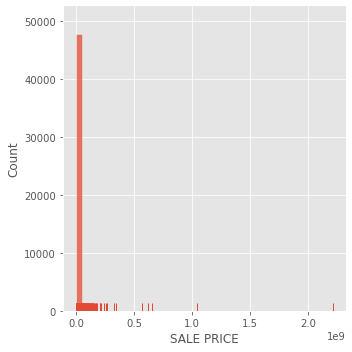

In [62]:
sns.displot(df1['SALE PRICE'], bins=40, rug=True)

In [63]:
# ambil data dari Land Square Feet dari 10.000 - 10.000.000
df2 = df1[(df1['SALE PRICE'] > 10000) & (df1['SALE PRICE'] < 10000000)]

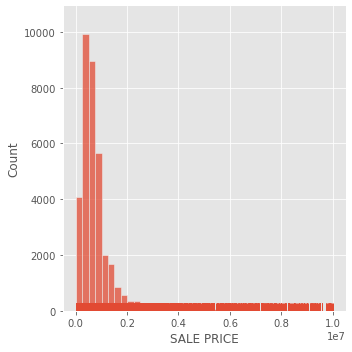

In [64]:
sns.displot(df2['SALE PRICE'], bins=40, rug=True)

In [65]:
df2['SALE PRICE'] = np.log(df2['SALE PRICE'])

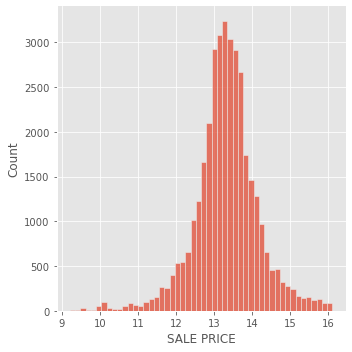

In [66]:
sns.displot(df2['SALE PRICE'], bins=50)

Kurva diatas secara visual dapat dikatakan normal karena berbentuk seimbang dumana nila median dan mean hampir setara satu sama lain.